<a href="https://colab.research.google.com/github/MonicaEN/Cognifyz-Internship/blob/main/Cognifyz_Technologies_Task_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Develop a machine learning model to
classify restaurants based on their cuisines.

In [101]:
# Necessary Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV,RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix,ConfusionMatrixDisplay

In [71]:
# Loading Dataset
data = pd.read_csv('/content/Dataset .csv')

data.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


Preprocessing

In [72]:
missing_values = data.isnull().sum()

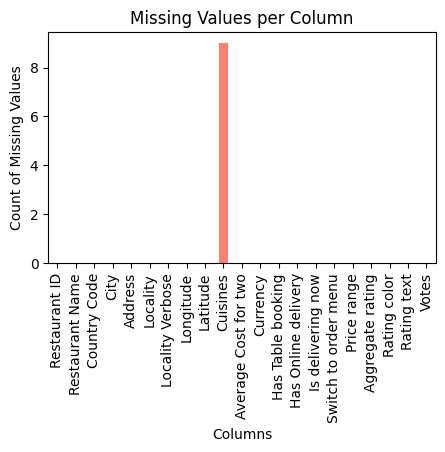

In [108]:
# Visualising missing values
missing_values.plot(kind='bar', figsize=(5,3), color='salmon')
plt.title("Missing Values per Column")
plt.ylabel("Count of Missing Values")
plt.xlabel("Columns")
plt.show()


In [75]:
# Dropping Unneccessary Rows
data.drop(
    [
        'Restaurant ID', 'Country Code', 'Address','Locality Verbose',
        'Longitude', 'Latitude', 'Currency', 'Has Table booking', 'Has Online delivery',
        'Is delivering now', 'Switch to order menu','Rating color', 'Rating text','Votes'
    ],
    axis=1,
    inplace=True
)

In [76]:
data['Cuisines'].value_counts()

,count
Cuisines,
North Indian,936
"North Indian, Chinese",511
Chinese,354
Fast Food,354
"North Indian, Mughlai",334
...,...
"Bengali, Fast Food",1
"North Indian, Rajasthani, Asian",1
"Chinese, Thai, Malaysian, Indonesian",1


In [85]:
# Calculate cuisine counts, handling NaN values
cuisine_counts = data['Cuisines'].value_counts(dropna=True)

# Replace rare cuisine categories with 'Other', handling NaN values
data['Cuisines'] = data['Cuisines'].apply(lambda x: x if x in cuisine_counts and cuisine_counts[x] > rare_threshold else 'Other')

In [79]:
data.drop(columns=['City','Locality','Price range','Aggregate rating'])

,Restaurant Name,Cuisines,Average Cost for two
0,Le Petit Souffle,"French, Japanese, Desserts",1100
1,Izakaya Kikufuji,Japanese,1200
2,Heat - Edsa Shangri-La,"Seafood, Asian, Filipino, Indian",4000
3,Ooma,"Japanese, Sushi",1500
4,Sambo Kojin,"Japanese, Korean",1500
...,...,...,...
9546,Naml۱ Gurme,Turkish,80
9547,Ceviz A��ac۱,"World Cuisine, Patisserie, Cafe",105
9548,Huqqa,"Italian, World Cuisine",170
9549,A���k Kahve,Restaurant Cafe,120


In [80]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant Name       9551 non-null   object 
 1   City                  9551 non-null   object 
 2   Locality              9551 non-null   object 
 3   Cuisines              9542 non-null   object 
 4   Average Cost for two  9551 non-null   int64  
 5   Price range           9551 non-null   int64  
 6   Aggregate rating      9551 non-null   float64
dtypes: float64(1), int64(2), object(4)
memory usage: 522.4+ KB


In [81]:
data.describe()

,Average Cost for two,Price range,Aggregate rating
count,9551.000000,9551.000000,9551.000000
mean,1199.210763,1.804837,2.666370
std,16121.183073,0.905609,1.516378
min,0.000000,1.000000,0.000000
25%,250.000000,1.000000,2.500000
50%,400.000000,2.000000,3.200000
75%,700.000000,2.000000,3.700000
max,800000.000000,4.000000,4.900000


In [82]:
data.shape

(9551, 7)

<ipython-input-109-59d5dae54fff>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='Cuisines', data=data, order=data['Cuisines'].value_counts().index, palette='viridis')


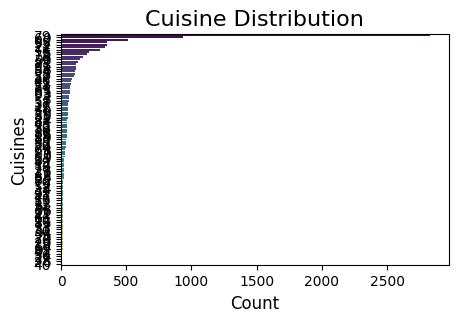

In [109]:
# Plotting the distribution of cuisines
plt.figure(figsize=(5,3))
sns.countplot(y='Cuisines', data=data, order=data['Cuisines'].value_counts().index, palette='viridis')
plt.title('Cuisine Distribution', fontsize=16)
plt.xlabel('Count', fontsize=12)
plt.ylabel('Cuisines', fontsize=12)
plt.show()

In [86]:
# Grouping rare cuisines into 'Other'
cuisine_counts = data['Cuisines'].value_counts()
rare_threshold = 10  # Adjust this based on your dataset
data['Cuisines'] = data['Cuisines'].apply(lambda x: x if cuisine_counts[x] > rare_threshold else 'Other')

In [87]:
# Showing only the top 10 cuisines
top_cuisines = data['Cuisines'].value_counts().head(10).index
filtered_data = data[data['Cuisines'].isin(top_cuisines)]

<ipython-input-89-2fcab18ef424>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='Cuisines', data=filtered_data, order=filtered_data['Cuisines'].value_counts().index, palette='viridis')


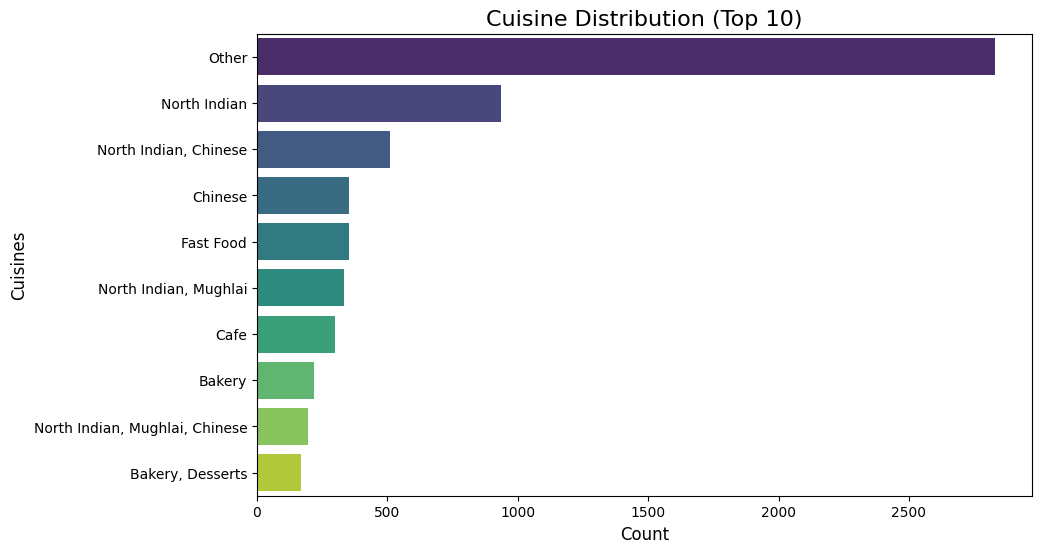

In [89]:
# plot after grouping or filtering
plt.figure(figsize=(10,6))
sns.countplot(y='Cuisines', data=filtered_data, order=filtered_data['Cuisines'].value_counts().index, palette='viridis')
plt.title('Cuisine Distribution (Top 10)', fontsize=16)
plt.xlabel('Count', fontsize=12)
plt.ylabel('Cuisines', fontsize=12)
plt.show()


In [90]:
# Encoding the Categorical features
Le = LabelEncoder()
for col in data.select_dtypes(include=['object']).columns:
   data[col] = Le.fit_transform(data[col])

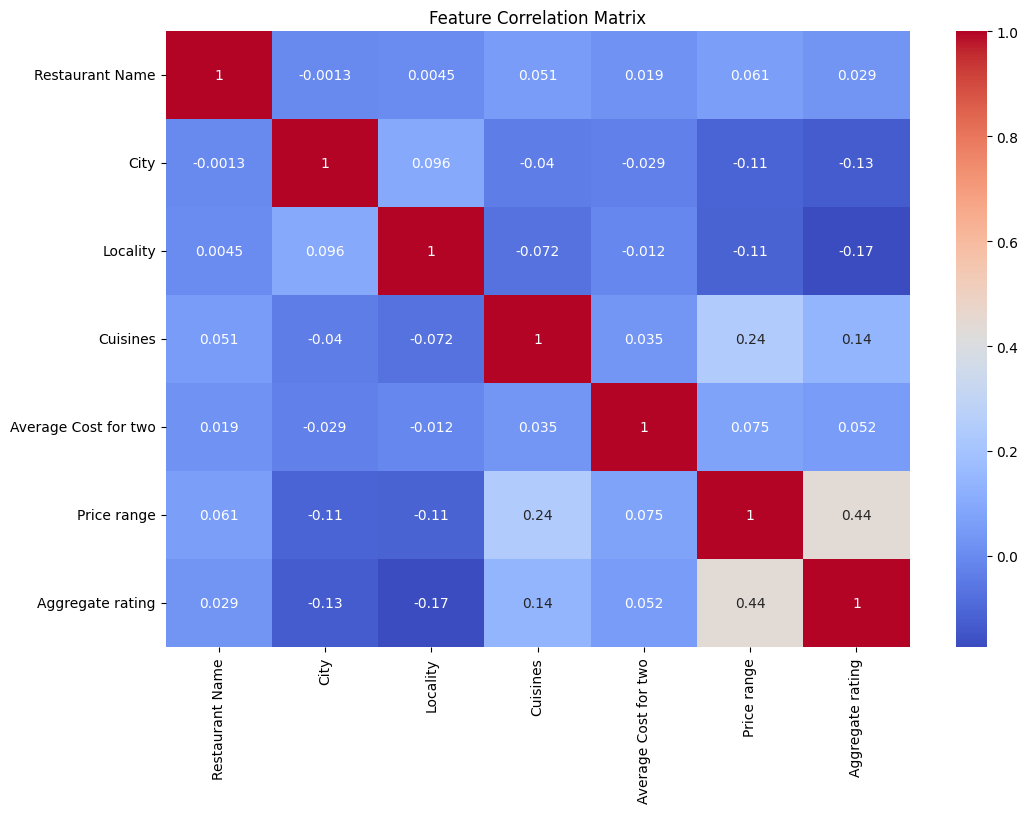

In [91]:
# Analysing the important features
correlation_matrix = data.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Feature Correlation Matrix")
plt.show()

In [95]:
X = data.drop("Cuisines", axis=1)  # Features
y = data["Cuisines"]              # Target

In [96]:
scaler = StandardScaler()
X=scaler.fit_transform(X)

Training and Testing set splitting

In [102]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [97]:
import warnings

# Suppress all warnings
warnings.filterwarnings("ignore", category=UserWarning)

In [98]:
# Initialize the logistic regression model
model = LogisticRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
predictions = model.predict(X_test)

In [104]:
# Evaluate
print("Accuracy:", accuracy_score(y_test,predictions))
precision = precision_score(y_test, predictions, average='micro')
recall = recall_score(y_test, predictions, average='micro')
f1 = f1_score(y_test, predictions, average='micro')
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-score: {f1:.2f}")
cm=confusion_matrix(y_test,predictions)
print(cm)

Accuracy: 0.0
Precision: 0.00
Recall: 0.00
F1-score: 0.00
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


Randomforest Model

In [106]:
# Initialize and train the Random Forest classifier with hyperparameter tuning
Rf = RandomForestClassifier(n_estimators = 100, random_state=42)
param_grid = {
    'n_estimators': [100],
    'max_depth': [10,None],
    'min_samples_split': [2, 5, 10]
}

grid_search_rf = GridSearchCV(estimator=Rf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search_rf.fit(X_train, y_train)

# Make predictions on the test set
y_pred_rf = grid_search_rf.predict(X_test)


Fitting 3 folds for each of 6 candidates, totalling 18 fits


In [107]:
# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
precision = precision_score(y_test, y_pred_rf, average='micro')
recall = recall_score(y_test, y_pred_rf, average='micro')
f1 = f1_score(y_test, y_pred_rf, average='micro')
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-score: {f1:.2f}")

Accuracy: 0.39298796441653583
Precision: 0.39
Recall: 0.39
F1-score: 0.39


By comparing Random Forest and Logistic Regression. Random Forest model is performing Better as compared to Logistic Regression.